# ECG Heatbat Categorization

Segmented and Pre-Processed ECG Signals for Heatbeat Classification

Source: https://www.kaggle.com/shayanfazeli/heartbeat

## Arrhythmia Dataset
* Number of Samples: 109446
* Number of Categories: 5
* Sampling Frequency: 125Hz
* Data Source: Physionet's MIT-BIH Arrhythmia Dataset

### Classes:
* N: Normal Beat (0)
* S: Supraventricular Premature Beat (1)
* V: Premature Ventricular Contraction (2)
* F: Fusion of Ventricular and Normal Neat (3)
* Q: Unclassifiable Beat (4)



In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Load Data:

In [2]:
train = pd.read_csv("../data/arrhythmia/mitbih_train.csv", header = None)
test = pd.read_csv("../data/arrhythmia/mitbih_test.csv", header = None)

In [3]:
# Last column reserved for classes
x_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

x_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

In [55]:
x_train.isna().sum().sum()

0

In [56]:
y_train.isna().sum().sum()

0

In [57]:
x_test.isna().sum().sum()

0

In [58]:
y_test.isna().sum().sum()

0

In [33]:
n = x_train.shape[1]
x = np.arange(n)
classes, class_count = np.unique(y_train, return_counts = True)
n_class = len(classes)

class_names = [
    "Normal Beat",
    "Supraventricular Premature Beat", 
    "Premature Ventricular Contraction",
    "Fusion of Ventricular and Normal Neat",
    "Unclassifiable Beat"
    ]

class_map = {k: v for (k, v) in enumerate(class_names)}

# Class Size Distribution:

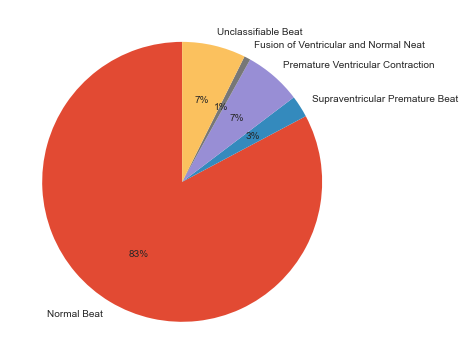

In [46]:
fig, ax = plt.subplots(figsize = (6, 6))

ax.pie(class_count, labels = class_names, startangle = 90, autopct = "%1.0f%%")
plt.style.use("seaborn-darkgrid")
plt.show()

# Sample Plots of Each Class:

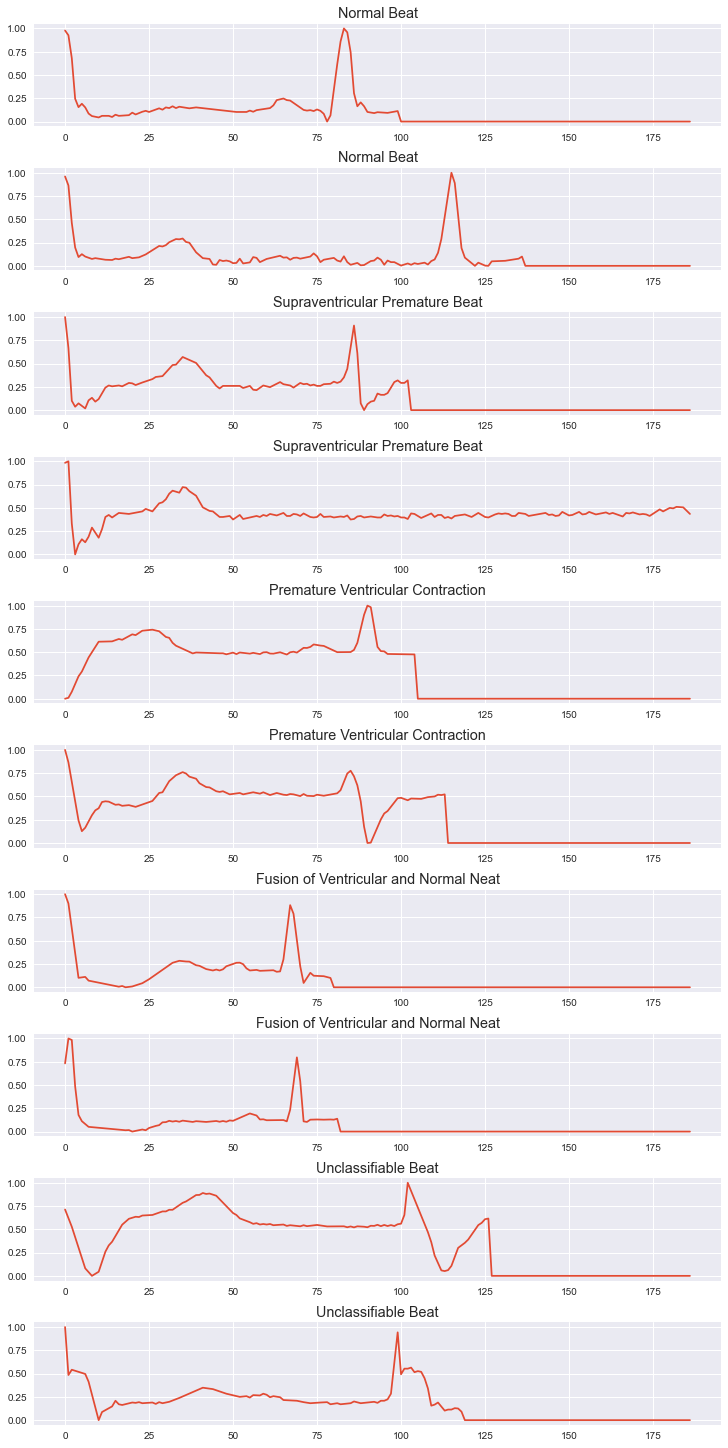

In [47]:
sample_size = 10
samples = np.array([y_train[y_train == i].index[:2] for i in range(5)]).flatten()

fig, ax = plt.subplots(10, 1, figsize = (10, 20), constrained_layout=True)

for i, idx in enumerate(samples):
    signal = x_train.T[idx]
    c = class_map[y_train[idx]]
    ax[i].plot(x, signal)
    ax[i].set_title(c)
plt.style.use("seaborn-darkgrid")
plt.show()

# Principal Component Analysis:

In [48]:
scaler  = StandardScaler()
x_train_ = scaler.fit_transform(x_train)

In [49]:
pca = PCA(2)
reduced = pca.fit_transform(x_train_)

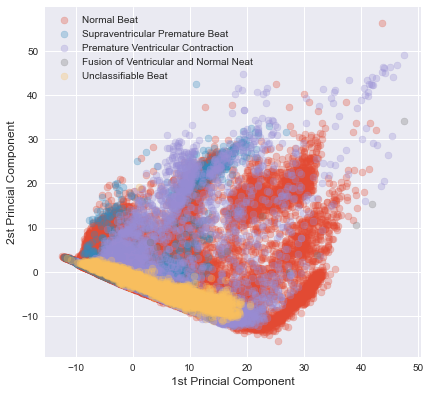

In [50]:
fig, ax = plt.subplots(figsize = (6, 6))

ax.scatter(reduced[y_train == 0][:, 0], reduced[y_train == 0][:, 1], alpha = 0.3)
ax.scatter(reduced[y_train == 1][:, 0], reduced[y_train == 1][:, 1], alpha = 0.3)
ax.scatter(reduced[y_train == 2][:, 0], reduced[y_train == 2][:, 1], alpha = 0.3)
ax.scatter(reduced[y_train == 3][:, 0], reduced[y_train == 3][:, 1], alpha = 0.3)
ax.scatter(reduced[y_train == 4][:, 0], reduced[y_train == 4][:, 1], alpha = 0.3)

ax.legend(class_names)

ax.set_xlabel("1st Princial Component")
ax.set_ylabel("2st Princial Component")
plt.style.use("seaborn-darkgrid")
plt.show()